# Susceptibility

In [55]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import json
import glob
import scipy.stats as stats
import pandas as pd

In [2]:
sns.set()

In [3]:
data_root = '../data/entropy-order-convolved/'
fig_root="../figures/"
# os.listdir(data_root)

In [101]:
M=8
m=10
classname="BA_NetworkPercolationExplosive_v7"
signature="{}_N_*_m_10_M_{}_entropy-order_*fast.txt".format(classname,M)

In [102]:
files=glob.glob(data_root + signature)

In [103]:
signature

'BA_NetworkPercolationExplosive_v7_N_*_m_10_M_8_entropy-order_*fast.txt'

In [104]:
files

['../data/entropy-order-convolved/BA_NetworkPercolationExplosive_v7_N_400000_m_10_M_8_entropy-order_2019_avg.txt_convoluted_1times_fast.txt',
 '../data/entropy-order-convolved/BA_NetworkPercolationExplosive_v7_N_800000_m_10_M_8_entropy-order_2019_avg.txt_convoluted_1times_fast.txt',
 '../data/entropy-order-convolved/BA_NetworkPercolationExplosive_v7_N_1000000_m_10_M_8_entropy-order_2019_avg.txt_convoluted_1times_fast.txt',
 '../data/entropy-order-convolved/BA_NetworkPercolationExplosive_v7_N_600000_m_10_M_8_entropy-order_2019_avg.txt_convoluted_1times_fast.txt',
 '../data/entropy-order-convolved/BA_NetworkPercolationExplosive_v7_N_1200000_m_10_M_8_entropy-order_2019_avg.txt_convoluted_1times_fast.txt']

### checking ensemble size

In [105]:
print("Ensemble sizes")
for file in files:
    with open(file) as f:
        line=f.readline()
        head=json.loads(line[1:])
        print("N=", head['N'], "  En=", head['En'])

Ensemble sizes
N= 400000   En= 20000
N= 800000   En= 20000
N= 1000000   En= 20000
N= 600000   En= 20000
N= 1200000   En= 20000


In [106]:
def find_specific_heat(t, H, N):
#     C = -t[1:]*np.diff(H)/np.diff(t)  # noisy data
    C = -t[1:]*np.diff(H)*N
#     print(1/np.diff(t)[0])
#     print(N)
    return C

def find_susceptibility(t, P, N):
    sus=np.diff(P)*N
    return sus

In [107]:
tc=0.72775

In [108]:
min_limit=0.97
max_limit=1.0

In [109]:
data=dict()
for file in files:
    with open(file) as f:
        line=f.readline()
        head=json.loads(line[1:])
        N=int(head['N'])
        M=int(head['M'])
        m=int(head['m'])
    X = np.loadtxt(file)
    t=X[:,0]
    index=(t > min_limit) & (t < max_limit)
    data[N] = X[index]
    

(11999, 3)
(23999, 3)
(29999, 3)
(17999, 3)
(35999, 3)


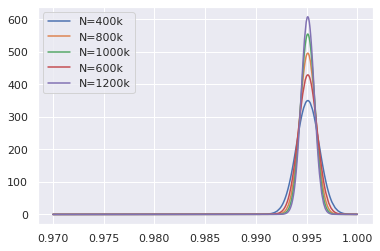

In [110]:
for N in data.keys():
    print(data[N].shape)
    t, H, P = data[N].T
    X = find_susceptibility(t, P, N)
    plt.plot(t[1:], X, label='N={}k'.format(N//1000))
    pass
plt.legend()
# plt.xlim([0.723, 0.735])
filename=fig_root + classname + "susceptibility_m{}_M{}".format(m, M)
plt.savefig(filename)

(11999, 3)
(23999, 3)
(29999, 3)
(17999, 3)
(35999, 3)


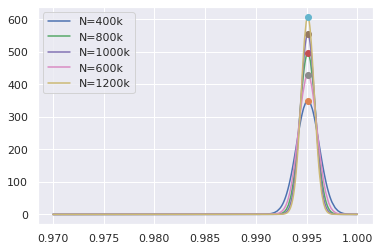

In [111]:
critical = []
for N in data.keys():
    print(data[N].shape)
    t, H, P = data[N].T
    X = find_susceptibility(t, P, N)
    i = np.argmax(X)
    critical.append([N, t[i], X[i]])
    plt.plot(t[1:], X, label='N={}k'.format(N//1000))
    plt.plot(t[i], X[i], 'o')
    pass
plt.legend()
# plt.xlim([0.723, 0.735])

In [112]:
def find_exponent(X):
    X=np.array(X)
    print(X.shape)
    plt.plot(np.log(X[:,0]), np.log(X[:,2]), 'o')
    regress = stats.linregress(np.log(X[:,0]), np.log(X[:,2]))
    print(regress)
    y = regress[0] * np.log(X[:,0]) + regress[1]
    plt.plot(np.log(X[:,0]), y)

(5, 3)
LinregressResult(slope=0.5021366646706512, intercept=-0.6183018154373707, rvalue=0.999999954296956, pvalue=1.1728745015206217e-11, stderr=8.764938684182822e-05)


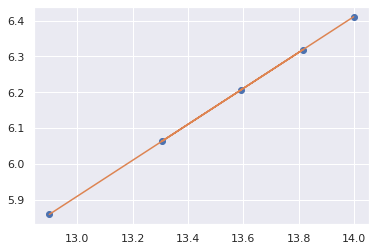

In [113]:
find_exponent(critical)


### It is evident that increasing system size gets you closer to the critical point

It flows the relation

$(t(N)-t_c(\infty)) N ^{1/\nu} = const $

$(t(N)-t_c) \sim N ^{-1/\nu}$

$(t(N)-t_c(\infty)) \sim N^{-1/\nu}$

In the limit $N\rightarrow \infty$, $t(N) = t_c(\infty)$

If $1/\nu$ is known then finding $t_c$ is very easy.

In [114]:
def find_tc(X, one_by_nu):
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))
    X=np.array(X)
    
    axs[0].plot(X[:,0], X[:,1], 'o')
    x = X[:,0]**(-one_by_nu)
    y = X[:,1]
    print(X.shape)
    axs[1].plot(x, y, 'o')
    regress = stats.linregress(x, y)
    print(regress)
    y = regress[0] * x + regress[1]
    axs[1].plot(x, y)

(5, 3)
LinregressResult(slope=0.016316029120485173, intercept=0.9951049405863498, rvalue=0.9920023691227731, pvalue=0.0008575396434187926, stderr=0.0011985792042507463)


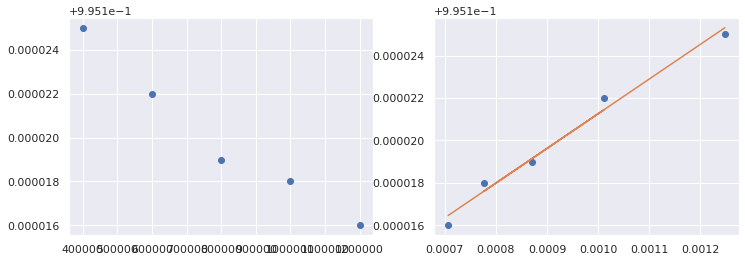

In [115]:
# one_by_nu = 0.5037072777685714
# one_by_nu = 0.5094726041604809
# one_by_nu = 0.5094789034354745
find_tc(critical, one_by_nu)

#### Data Collapse

Read exponents from a file 
so that I don't have to type it every time

In [142]:
filename = "BA_explosive_exponents"
df = pd.read_csv(filename)
df.index = df['M']

tc = df['tc'][M]
one_by_nu = df['one_by_nu'][M]
gamma_by_nu = df['gamma_by_nu'][M]

print(M)
print(tc)
print(one_by_nu)
print(gamma_by_nu)
# print(df)

8
0.9951985920490224
0.5233953305075367
0.5021366646706512


(11999, 3)
(23999, 3)
(29999, 3)
(17999, 3)
(35999, 3)


(-5, 5)

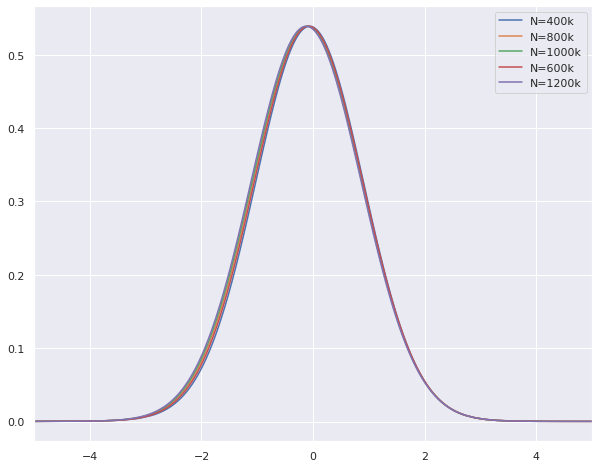

In [143]:
# one_by_nu -= 0.02
# tc -= 0.00001

fig=plt.figure(figsize=(10,8))
for N in data.keys():
    print(data[N].shape)
    t, H, P = data[N].T
    X = find_susceptibility(t, P, N)
    x=(t-tc)*N**(one_by_nu)
    y=X*N**(-gamma_by_nu)
    plt.plot(x[1:], y, label='N={}k'.format(N//1000))
    pass
plt.legend()
plt.xlim([-5, 5])

In [139]:
tc 

0.9951985920490225

In [33]:
one_by_nu

0.5037072777685714